In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head(100)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,65,3.0,0,0.0,0.0,0,0,0,193.0,123.0,76.5,29.33,60.0,96.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
98,0,56,1.0,0,0.0,0.0,0,1,0,296.0,180.0,90.0,23.72,75.0,120.0,0


In [4]:
data=data.drop(labels='education',axis=1)    #Dropping education column

In [5]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data_new = pd.DataFrame(imputer.fit_transform(data))
data_new.columns = data.columns
data_new.index = data.index

In [7]:
data_new.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
X = data_new.iloc[:,:-1].values
y = data_new.iloc[:, -1].values

In [9]:
X[:,8]=(X[:,8]-min(X[:,8]))/(max(X[:,8])-min(X[:,8]))
X[:,9]=(X[:,9]-min(X[:,9]))/(max(X[:,9])-min(X[:,9]))
X[:,10]=(X[:,10]-min(X[:,10]))/(max(X[:,10])-min(X[:,10]))
X[:,11]=(X[:,11]-min(X[:,11]))/(max(X[:,11])-min(X[:,11]))
X[:,12]=(X[:,12]-min(X[:,12]))/(max(X[:,12])-min(X[:,12]))
X[:,13]=(X[:,13]-min(X[:,13]))/(max(X[:,13])-min(X[:,13]))


In [10]:
X[:,1]/=10
X[:,3]/=10



Text(0.5, 1.0, 'Class Distributions after resampling')

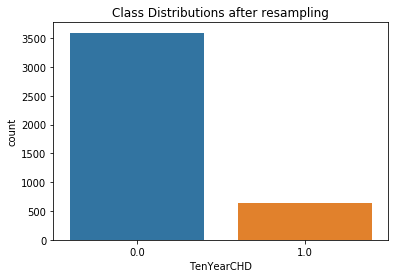

In [11]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
smote=SMOTE()
df_temp = {'TenYearCHD' : y}
df = pd.DataFrame(df_temp)
plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data = df)
plt.title('Class Distributions after resampling')

In [12]:
X_train,Y_train=smote.fit_sample(X,y)

In [13]:
from collections import Counter
print("Before SMOTE: ",Counter(y))
print("After SMOTE: ",Counter(Y_train))

Before SMOTE:  Counter({0.0: 3594, 1.0: 644})
After SMOTE:  Counter({0.0: 3594, 1.0: 3594})


Text(0.5, 1.0, 'Class Distributions after resampling')

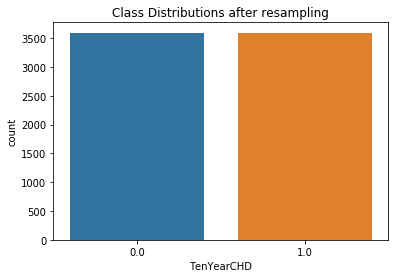

In [14]:
df_temp = {'TenYearCHD' : Y_train}
df = pd.DataFrame(df_temp)

plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data = df)
plt.title('Class Distributions after resampling')

In [15]:
Y_train = Y_train.reshape(len(Y_train), 1)
print(X_train.shape, Y_train.shape)

(7188, 14) (7188, 1)


In [16]:
import random
combined=list(zip(X_train,Y_train))

In [17]:
random.shuffle(combined)

In [18]:
X_train[:],Y_train[:]=zip(*combined)

In [19]:
print(X_train.shape, Y_train.shape)

(7188, 14) (7188, 1)


In [20]:
X=np.array(X_train)
y=np.array(Y_train)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
x_train.shape

(5750, 14)

In [24]:
y_train.shape

(5750, 1)

In [25]:
x_test.shape

(1438, 14)

In [26]:
y_test.shape

(1438, 1)

In [27]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [28]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(14, 5750) (14, 1438) (1, 5750) (1, 1438)


In [29]:
def initialize_weights_and_bias(dimension):
     
    weight = np.full((dimension,1),0.01) 
    bias = 0.0
    return weight,bias


def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head 

In [30]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b  # Logistic regression equation = z = b + px1w1 + px2w2 + ... + px4096*w4096 
    y_head = sigmoid(z) 
    loss = -y_train*np.log(y_head+0.001)-(1-y_train)*np.log(1.001-y_head)  #loss function
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    
    
    # backward propagation We need to take the derivative of our cost and loss function according to weight and bias and update it.
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias} 
    return cost,gradients

In [36]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []  #to save all costs
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 50000 == 0: #to show every 10 elements
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


In [37]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [38]:

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 15
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters


Cost after iteration 0: 0.673295
Cost after iteration 50000: 0.544058
Cost after iteration 100000: 0.540008
Cost after iteration 150000: 0.538819
Cost after iteration 200000: 0.538353
Cost after iteration 250000: 0.538128
Cost after iteration 300000: 0.538003
Cost after iteration 350000: 0.537928
Cost after iteration 400000: 0.537880
Cost after iteration 450000: 0.537848
Cost after iteration 500000: 0.537826
Cost after iteration 550000: 0.537811
Cost after iteration 600000: 0.537801
Cost after iteration 650000: 0.537793
Cost after iteration 700000: 0.537788
Cost after iteration 750000: 0.537784
Cost after iteration 800000: 0.537781
Cost after iteration 850000: 0.537779
Cost after iteration 900000: 0.537778
Cost after iteration 950000: 0.537777


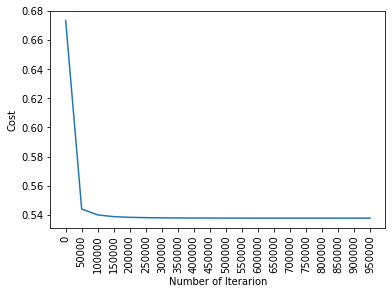

test accuracy: 87.60083449235049 %


In [40]:
parameters=logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1000000)

In [42]:
parameters

{'weight': array([[ 0.54378466],
        [ 0.7267428 ],
        [-0.08620111],
        [ 0.26688675],
        [ 0.17422981],
        [ 0.40653534],
        [ 0.14582588],
        [ 0.08463437],
        [ 2.59927923],
        [ 3.62706283],
        [ 0.29213788],
        [-0.08255394],
        [ 0.03400593],
        [ 1.25041173]]),
 'bias': -5.345086581390208}

In [49]:
import pickle

In [50]:
#X=np.array([(1,50,0,1,1,0,1,0,32,200,200,229,69,103)],dtype=np.float32)
#X=X.reshape(X.shape[0],-1).T

In [51]:
file=open('My_Model_Logistic.pkl','wb')

In [52]:
pickle.dump(parameters,file)